In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import numpy as np


sns.plotting_context("talk")

produit = pd.read_csv("products.csv")
client = pd.read_csv("customers.csv")
vente = pd.read_csv("transactions.csv")



vente = vente.drop(vente[vente.id_prod == 'T_0'].index)
vente['date'] = pd.to_datetime(vente['date'], format='%Y-%m-%d')


# Vérification des tables

# Produit

In [2]:
print(produit.head(5))

  id_prod  price  categ
0  0_1421  19.99      0
1  0_1368   5.13      0
2   0_731  17.99      0
3   1_587   4.99      1
4  0_1507   3.99      0


In [3]:
print(produit.shape)
print(produit.describe(include='all'))

(3287, 3)
       id_prod        price        categ
count     3287  3287.000000  3287.000000
unique    3287          NaN          NaN
top     0_1421          NaN          NaN
freq         1          NaN          NaN
mean       NaN    21.856641     0.370246
std        NaN    29.847908     0.615387
min        NaN    -1.000000     0.000000
25%        NaN     6.990000     0.000000
50%        NaN    13.060000     0.000000
75%        NaN    22.990000     1.000000
max        NaN   300.000000     2.000000


'id_prod' est bel et bien une clé primaire, car ils sont tous uniques.

# Client

In [4]:
print(client.head(5))

  client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943


In [5]:
print(client.shape)
print(client.describe(include='all'))

(8623, 3)
       client_id   sex        birth
count       8623  8623  8623.000000
unique      8623     2          NaN
top       c_4410     f          NaN
freq           1  4491          NaN
mean         NaN   NaN  1978.280877
std          NaN   NaN    16.919535
min          NaN   NaN  1929.000000
25%          NaN   NaN  1966.000000
50%          NaN   NaN  1979.000000
75%          NaN   NaN  1992.000000
max          NaN   NaN  2004.000000


De même pour 'client_id'

# Vente

In [6]:
print(vente.head(5))

  id_prod                       date session_id client_id
0  0_1518 2022-05-20 13:21:29.043970   s_211425     c_103
1   1_251 2022-02-02 07:55:19.149409   s_158752    c_8534
2  0_1277 2022-06-18 15:44:33.155329   s_225667    c_6714
3   2_209 2021-06-24 04:19:29.835891    s_52962    c_6941
4  0_1509 2023-01-11 08:22:08.194479   s_325227    c_4232


In [7]:
print(vente.describe(include='all'))

C:\Users\thebe\AppData\Local\Temp\ipykernel_1544\4137422567.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(vente.describe(include='all'))


       id_prod                        date session_id client_id
count   679332                      679332     679332    679332
unique    3266                      679332     342315      8600
top      1_369  2022-05-20 13:21:29.043970   s_118668    c_1609
freq      2252                           1         14     25488
first      NaN  2021-03-01 00:01:07.843138        NaN       NaN
last       NaN  2023-02-28 23:58:30.792755        NaN       NaN


# Fusion des Tables

In [8]:
tableTotale = pd.merge(vente, produit, on='id_prod', how='left')
tableTotale = pd.merge(tableTotale, client, on='client_id', how='left')

In [9]:
tableTotale = tableTotale.drop(tableTotale[tableTotale.id_prod == 'T_0'].index)

Création d'une tranche d'age

In [10]:
def arrondiDizaine(n):
    while n%10 !=0:
        n=n-1
    return n

In [11]:
tableTotale['age'] = pd.DatetimeIndex(tableTotale['date']).year - tableTotale['birth']

In [12]:
tableTotale['trancheAge'] = tableTotale['age'].apply(arrondiDizaine)

tableTotale.loc[tableTotale["trancheAge"] >= 100, "trancheAge"] = "100+"
tableTotale.loc[tableTotale["trancheAge"] == 10, "trancheAge"] = "10-20"
tableTotale.loc[tableTotale["trancheAge"] == 20, "trancheAge"] = "20-30"
tableTotale.loc[tableTotale["trancheAge"] == 30, "trancheAge"] = "30-40"
tableTotale.loc[tableTotale["trancheAge"] == 40, "trancheAge"] = "40-50"
tableTotale.loc[tableTotale["trancheAge"] == 50, "trancheAge"] = "50-60"
tableTotale.loc[tableTotale["trancheAge"] == 60, "trancheAge"] = "60-70"
tableTotale.loc[tableTotale["trancheAge"] == 70, "trancheAge"] = "70-80"
tableTotale.loc[tableTotale["trancheAge"] == 80, "trancheAge"] = "80-90"
tableTotale.loc[tableTotale["trancheAge"] == 90, "trancheAge"] = "90-100"


In [13]:
print(tableTotale.describe(include='all', datetime_is_numeric=True))

       id_prod                           date session_id client_id  \
count   679332                         679332     679332    679332   
unique    3266                            NaN     342315      8600   
top      1_369                            NaN   s_118668    c_1609   
freq      2252                            NaN         14     25488   
mean       NaN  2022-03-03 15:13:19.307389696        NaN       NaN   
min        NaN     2021-03-01 00:01:07.843138        NaN       NaN   
25%        NaN  2021-09-08 09:14:25.055994368        NaN       NaN   
50%        NaN  2022-03-03 07:50:20.817730560        NaN       NaN   
75%        NaN  2022-08-30 23:57:08.555173888        NaN       NaN   
max        NaN     2023-02-28 23:58:30.792755        NaN       NaN   
std        NaN                            NaN        NaN       NaN   

                price          categ     sex          birth            age  \
count   679111.000000  679111.000000  679332  679332.000000  679332.000000   
uni

In [14]:
print(tableTotale.sample(5))

       id_prod                       date session_id client_id  price  categ  \
345777   1_735 2022-11-21 11:39:04.687085   s_300688    c_4496  22.99    1.0   
376456   2_109 2021-03-08 22:53:37.099487     s_3668    c_4037  53.99    2.0   
384932  0_1137 2022-07-29 04:25:23.648627   s_245282    c_4211   7.99    0.0   
82423    2_202 2023-01-18 19:49:28.512120   s_328882    c_3736  67.57    2.0   
581102   1_504 2021-09-19 00:29:25.802853    s_91993    c_2810  13.79    1.0   

       sex  birth  age trancheAge  
345777   m   1947   75      70-80  
376456   f   1994   27      20-30  
384932   m   1987   35      30-40  
82423    f   1998   25      20-30  
581102   m   1978   43      40-50  


Ajout du nombre d'achats moyen par mois

In [15]:
print(tableTotale.describe(include='all', datetime_is_numeric=True))

       id_prod                           date session_id client_id  \
count   679332                         679332     679332    679332   
unique    3266                            NaN     342315      8600   
top      1_369                            NaN   s_118668    c_1609   
freq      2252                            NaN         14     25488   
mean       NaN  2022-03-03 15:13:19.307389696        NaN       NaN   
min        NaN     2021-03-01 00:01:07.843138        NaN       NaN   
25%        NaN  2021-09-08 09:14:25.055994368        NaN       NaN   
50%        NaN  2022-03-03 07:50:20.817730560        NaN       NaN   
75%        NaN  2022-08-30 23:57:08.555173888        NaN       NaN   
max        NaN     2023-02-28 23:58:30.792755        NaN       NaN   
std        NaN                            NaN        NaN       NaN   

                price          categ     sex          birth            age  \
count   679111.000000  679111.000000  679332  679332.000000  679332.000000   
uni

# Calcul du chiffre d'affaire

In [16]:
chiffreAffaire = tableTotale[['price', 'date', 'id_prod', 'categ']].sort_values(by='date')

<AxesSubplot:xlabel='date', ylabel='semestre'>

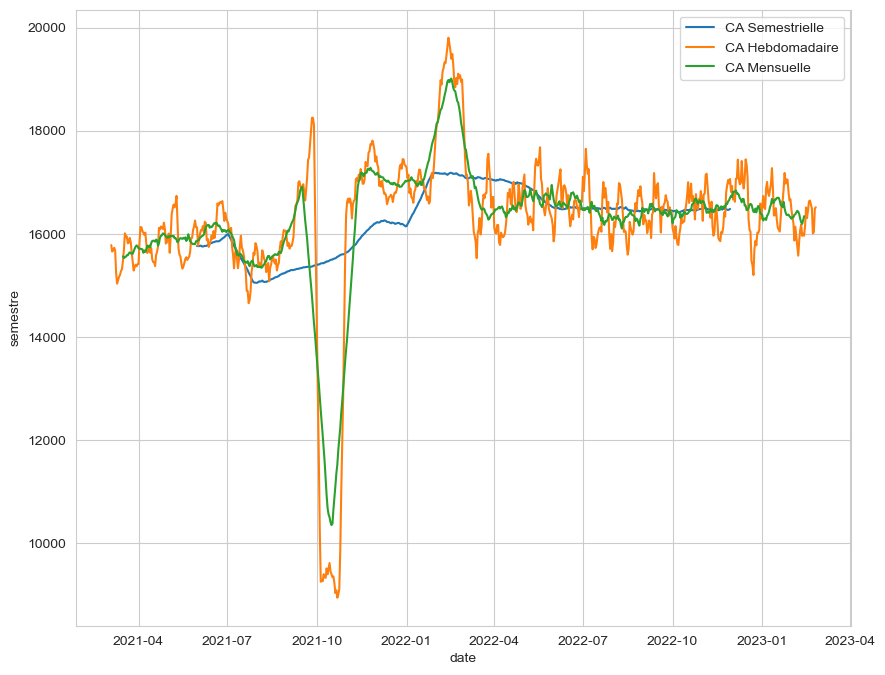

In [17]:
plt.figure(figsize=(10,8))

chiffreAffaireJournalier = chiffreAffaire[['price', 'date']].resample('D', on='date').sum()

chiffreAffaireJournalier['jour'] = chiffreAffaireJournalier['price'].rolling(1).mean().shift(0)
chiffreAffaireJournalier['semaine'] = chiffreAffaireJournalier['price'].rolling(7).mean().shift(-3)
chiffreAffaireJournalier['mois'] = chiffreAffaireJournalier['price'].rolling(31).mean().shift(-15)
chiffreAffaireJournalier['semestre'] = chiffreAffaireJournalier['price'].rolling(183).mean().shift(-91)

"""
sns.lineplot(x="date",y="price",
             label="CA Journalier", data=chiffreAffaireJournalier,
             ci=None)
"""
# Time series plot with Seaborn lineplot() with label
sns.lineplot(x="date",y="semestre",
             label="CA Semestrielle",
             data=chiffreAffaireJournalier,
             ci=None)

# 7-day rolling average Time series plot with Seaborn lineplot() with label
sns.lineplot(x="date",y="semaine",
             label="CA Hebdomadaire",
             data=chiffreAffaireJournalier,
             ci=None)

# Time series plot with Seaborn lineplot() with label
sns.lineplot(x="date",y="mois",
             label="CA Mensuelle",
             data=chiffreAffaireJournalier,
             ci=None)


# Nombre de Ventes par catégorie

<AxesSubplot:xlabel='date', ylabel='Count'>

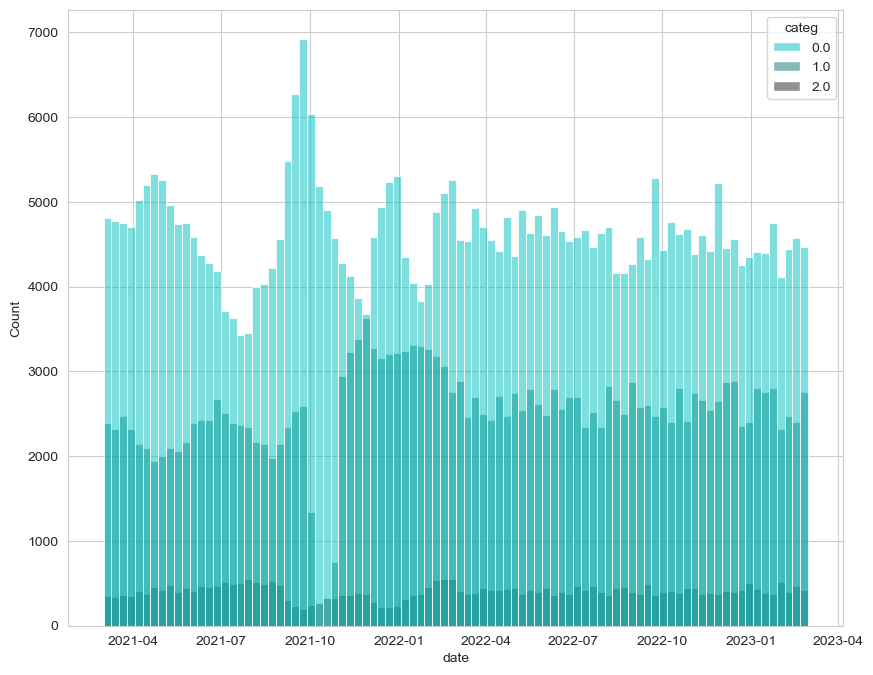

In [18]:
plt.figure(figsize=(10,8))
sns.histplot(data=tableTotale, x='date', hue='categ',palette="dark:c_r")

# Ajout de la fréquence d'achat

Comme on peut le voir il manque certaines données du mois d'octobre

On ajoute la fréquence d'achat en ignorant le mois d'octobre

In [19]:
#print(tableTotale[tableTotale['date']>'2022-10-10'])

tableTotaleOctobre = tableTotale.copy(deep=True)
tableTotaleOctobre = tableTotaleOctobre.drop(tableTotaleOctobre[(tableTotaleOctobre['date']>='2021-10-01') & (tableTotaleOctobre['date']<='2021-10-31')].index)
print(tableTotaleOctobre)
tableTotaleOctobre = tableTotaleOctobre.merge(
    tableTotaleOctobre.groupby('client_id').count()['date'].reset_index().rename(columns={'date': 'nombre d\'achats'}),
    how='left', on='client_id')
tableTotaleOctobre['ventes_mensuelles'] = round(tableTotaleOctobre['nombre d\'achats'] / 11,2)
print(tableTotaleOctobre.describe())

       id_prod                       date session_id client_id  price  categ  \
0       0_1518 2022-05-20 13:21:29.043970   s_211425     c_103   4.18    0.0   
1        1_251 2022-02-02 07:55:19.149409   s_158752    c_8534  15.99    1.0   
2       0_1277 2022-06-18 15:44:33.155329   s_225667    c_6714   7.99    0.0   
3        2_209 2021-06-24 04:19:29.835891    s_52962    c_6941  69.99    2.0   
4       0_1509 2023-01-11 08:22:08.194479   s_325227    c_4232   4.99    0.0   
...        ...                        ...        ...       ...    ...    ...   
679327  0_1551 2022-01-15 13:05:06.246925   s_150195    c_8489  12.99    0.0   
679328   1_639 2022-03-19 16:03:23.429229   s_181434    c_4370  10.99    1.0   
679329  0_1425 2022-12-20 04:33:37.584749   s_314704     c_304  12.99    0.0   
679330  0_1994 2021-07-16 20:36:35.350579    s_63204    c_2227   4.98    0.0   
679331   1_523 2022-09-28 01:12:01.973763   s_274568    c_3873  23.99    1.0   

       sex  birth  age trancheAge  
0  

Et en le prenant en compte

In [20]:
tableTotale = tableTotale.merge(
    tableTotale.groupby('client_id').count()['date'].reset_index().rename(columns={'date': 'nombre d\'achats'}),
    how='left', on='client_id')
tableTotale['ventes_mensuelles'] = round(tableTotale['nombre d\'achats'] / 12,2)
print(tableTotale.describe())

               price          categ          birth            age  \
count  679111.000000  679111.000000  679332.000000  679332.000000   
mean       17.454773       0.441953    1977.811139      43.859363   
std        18.328998       0.595042      13.574553      13.590215   
min         0.620000       0.000000    1929.000000      17.000000   
25%         8.870000       0.000000    1970.000000      35.000000   
50%        13.990000       0.000000    1980.000000      42.000000   
75%        18.990000       1.000000    1987.000000      51.000000   
max       300.000000       2.000000    2004.000000      94.000000   

       nombre d'achats  ventes_mensuelles  
count    679332.000000      679332.000000  
mean       1314.630393         109.552579  
std        4947.295284         412.274584  
min           1.000000           0.080000  
25%          65.000000           5.420000  
50%         123.000000          10.250000  
75%         224.000000          18.670000  
max       25488.000000    

Comparons la fréquence d'achat si on prend en compte le mois d'octobre ou non

In [21]:

def txEvo(col1,col2):

    col1 = col1.values.tolist()
    col2 = col2.values.tolist()

    if len(col1) > len(col2):
        l=len(col1)
    else:
        l=len(col2)

    a=[]
    for i in range(0,l):
        v1=col1[i]
        v2=col2[i]
        if v1 !=0:
            a.append(((v2 - v1) / v1) * 100)
        else:
            a.append(0)
            print(v1,v2,a[-1])

    return pd.Series(a)

In [22]:
def valeurAberrante(df,id,k):
    Q1 = list(df[id].quantile([0.25]))[0]
    Q3 = list(df[id].quantile([0.75]))[0]
    Normaux = df[df[id]<=(Q3+k*(Q3-Q1))]
    Haut = df[df[id]>(Q3+k*(Q3-Q1))]
    return(Normaux, Haut)

In [42]:
df = pd.DataFrame()
df['all'] = tableTotale['ventes_mensuelles']
df['noOct'] = tableTotaleOctobre['ventes_mensuelles']
df['diff'] = txEvo(df['noOct'],df['all'])

print(df.describe())


                 all          noOct          diff
count  679332.000000  658664.000000  6.586640e+05
mean      109.552579     114.590846  1.474505e+03
std       412.274584     430.872152  9.904656e+03
min         0.080000       0.090000 -9.999237e+01
25%         5.420000       5.730000 -6.070727e+01
50%        10.250000      10.820000 -5.070816e+00
75%        18.670000      19.640000  1.272727e+02
max      2124.000000    2226.730000  1.179900e+06


In [43]:
print(valeurAberrante(df,'diff',1.5)[0].describe())

                 all          noOct           diff
count  580588.000000  580588.000000  580588.000000
mean       18.397017     128.970874      14.711105
std       117.546621     457.017089     110.144458
min         0.080000       0.270000     -99.992365
25%         5.000000       6.550000     -65.723438
50%         9.000000      11.550000     -21.030641
75%        15.670000      20.550000      60.074627
max      2124.000000    2226.730000     409.233792


<AxesSubplot:>

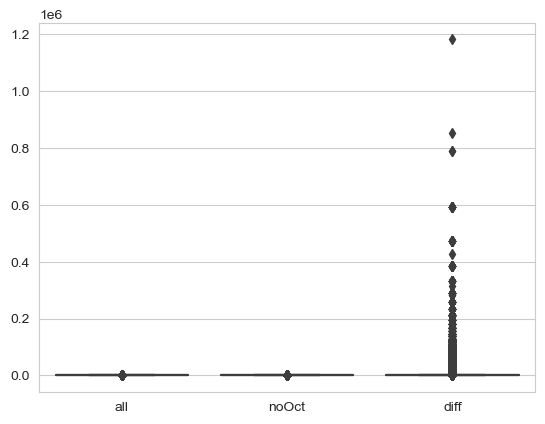

In [26]:
"""f, ax = plt.subplots(nrows=2, ncols=2, sharex=True,gridspec_kw=dict(height_ratios=[1, 1], width_ratios=[3, 3]), figsize=(5,5))"""
"""sns.boxplot(x=df['all'], width=0.5)
sns.boxplot(x=df['noOct'], width=0.5)"""
"""sns.histplot(x=tableTotale['ventes_mensuelles'],cumulative=True, kde=True, ax=ax[0,1])
sns.histplot(x=tableTotaleOctobre['ventes_mensuelles'],cumulative=True, kde=True, ax=ax[1,1])"""
"""
sns.histplot(data=df, x="all", color="skyblue", label="all", kde=True,cumulative=True)
sns.histplot(data=df, x="noOct", color="red", label="noOct", kde=True,cumulative=True)
plt.legend()
plt.show()
"""
"""
f, (ax_box1, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.10, .10)},  figsize=(7,10))
sns.catplot(x=df['all'], width=0.5, showfliers = False,ax=ax_box)

sns.catplot(x=df['noOct'], width=0.5, showfliers = False,ax=ax_box1)
"""

sns.boxplot(data=df,showfliers=False)
sns.boxplot(data=df,showfliers=True)



# Chiffre d'affaire par produit

<AxesSubplot:ylabel='id_prod'>

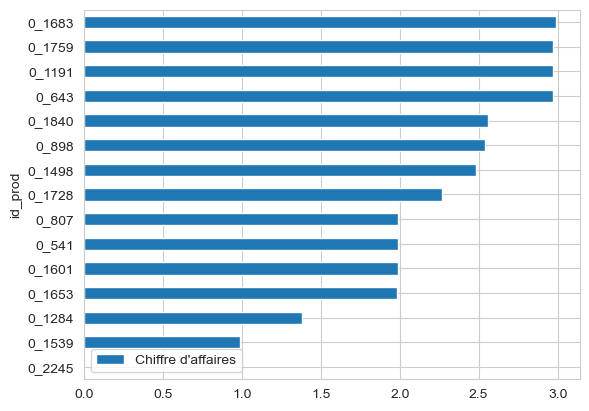

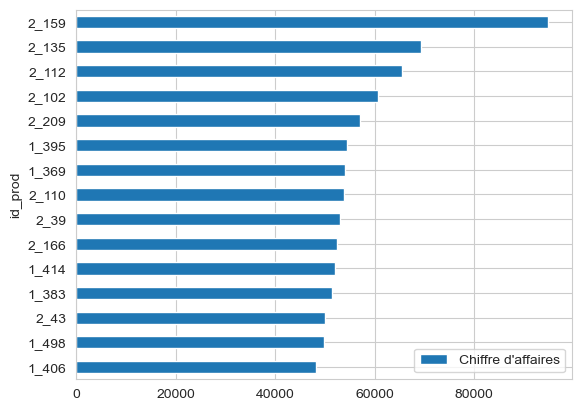

In [27]:
# ----------------------------------------------------------------------------------------------------------------------
# Chiffre d'affaire par produit/catégorie ------------------------------------------------------------------------------

# chiffreAffaireProduit = chiffreAffaire.groupby(['id_prod'],
# pd.Grouper(key='date', axis=0, freq='M')).sum().rename(columns={"price": "Chiffre d'affaires"})

chiffreAffaireProduit = chiffreAffaire.copy(deep=True)
chiffreAffaireProduit.set_index('date')
chiffreAffaireProduit.index = pd.to_datetime(chiffreAffaireProduit.index)
chiffreAffaireProduit = chiffreAffaireProduit.groupby('id_prod').sum().sort_values(by='price').rename(columns={"price": "Chiffre d'affaires"})

chiffreAffaireProduit.head(15)[['Chiffre d\'affaires']].plot.barh()
chiffreAffaireProduit.tail(15)[['Chiffre d\'affaires']].plot.barh()

# Chiffre d'affaire par catégorie

In [28]:
chiffreAffaire

,price,date,id_prod,categ
480501,11.99,2021-03-01 00:01:07.843138,0_1259,0.0
428350,19.37,2021-03-01 00:02:26.047414,0_1390,0.0
462563,4.50,2021-03-01 00:02:38.311413,0_1352,0.0
488153,6.55,2021-03-01 00:04:54.559692,0_1458,0.0
438944,16.49,2021-03-01 00:05:18.801198,0_1358,0.0
...,...,...,...,...
184602,21.92,2023-02-28 23:49:03.148402,1_508,1.0
588008,48.99,2023-02-28 23:51:29.318531,2_37,2.0
130140,26.99,2023-02-28 23:53:18.929676,1_695,1.0
550293,8.99,2023-02-28 23:58:00.107815,0_1547,0.0


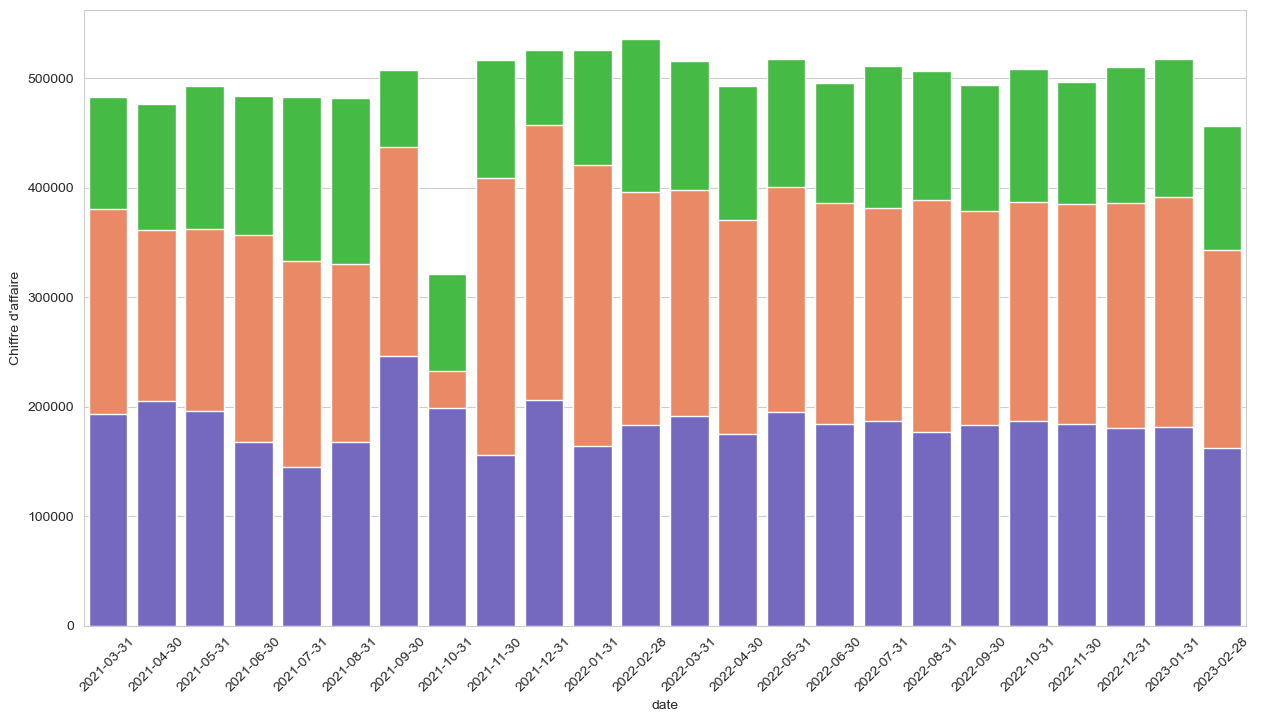

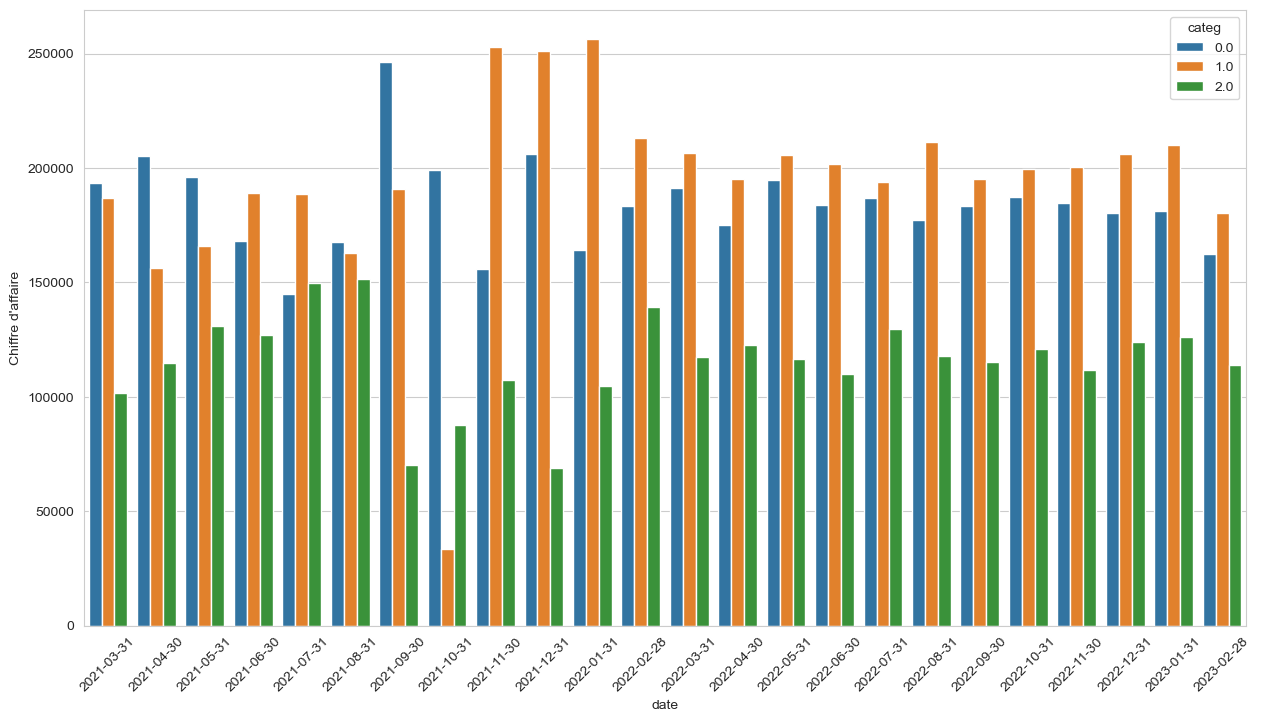

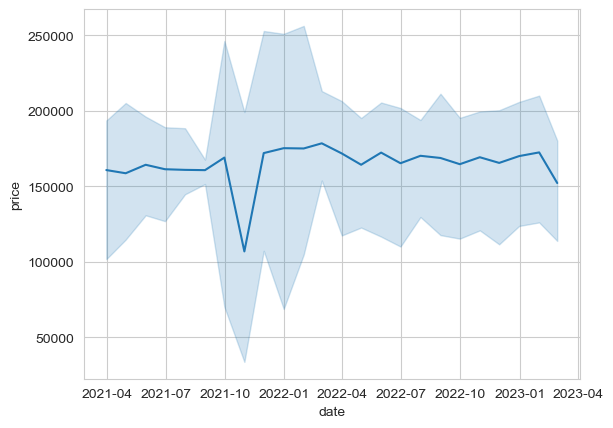

          date  categ      price
0   2021-03-31    0.0  193629.17
1   2021-03-31    1.0  186974.17
2   2021-03-31    2.0  101837.27
3   2021-04-30    0.0  205222.46
4   2021-04-30    1.0  156138.35
..         ...    ...        ...
67  2023-01-31    1.0  210104.41
68  2023-01-31    2.0  126153.08
69  2023-02-28    0.0  162457.00
70  2023-02-28    1.0  180347.24
71  2023-02-28    2.0  113875.52

[72 rows x 3 columns]


In [29]:
plt.figure(figsize=(15,8))
chiffreAffaireCategorie = chiffreAffaire.groupby(by=[pd.Grouper(key='date', freq='M'), 'categ'])['price'].sum().unstack(fill_value=0).reset_index()
chiffreAffaireCategorie['date'] = pd.to_datetime(chiffreAffaireCategorie['date']).dt.date
chiffreAffaireCategorie[1.0] = chiffreAffaireCategorie[1.0] + chiffreAffaireCategorie[0.0]
chiffreAffaireCategorie[2.0] = chiffreAffaireCategorie[1.0] + chiffreAffaireCategorie[2.0]

Cat2 = sns.barplot(x = 'date', y = 2.0, data = chiffreAffaireCategorie, color = 'limegreen')
Cat1 = sns.barplot(x = 'date', y = 1.0, data = chiffreAffaireCategorie, color = 'coral')
Cat0 = sns.barplot(x = 'date', y = 0.0, data = chiffreAffaireCategorie, color = 'slateblue')

plt.ylabel('Chiffre d\'affaire')
plt.xticks(rotation=45)


chiffreAffaireCategorie = chiffreAffaire.copy(deep=True)

plt.figure(figsize=(15,8))
chiffreAffaireCategorie = chiffreAffaireCategorie.groupby(by=[pd.Grouper(key='date', freq='M'), 'categ'])['price'].sum().reset_index()#.unstack(fill_value=0)##
chiffreAffaireCategorie['date'] = pd.to_datetime(chiffreAffaireCategorie['date']).dt.date

sns.barplot(data=chiffreAffaireCategorie,x='date',y='price',hue='categ')
plt.xticks(rotation=45)
plt.ylabel('Chiffre d\'affaire')
plt.show()

sns.lineplot(data=chiffreAffaireCategorie,x='date',y='price')
#chiffreAffaireCategorie.plot.bar(stacked=True, x='date')
plt.show()
print(chiffreAffaireCategorie)



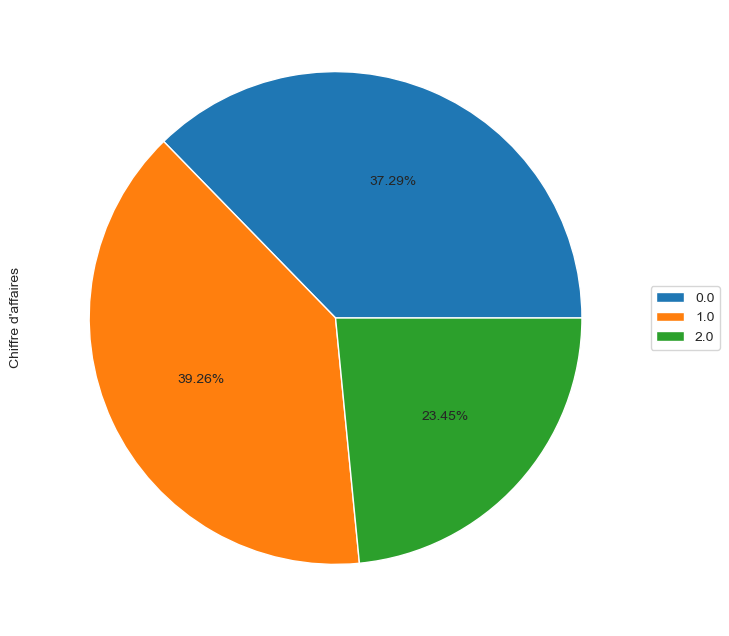

In [30]:

chiffreAffaireCategorie = chiffreAffaire.groupby(by='categ')['price'].sum().rename("Chiffre d'affaires")
chiffreAffaireCategorie.plot.pie(autopct=lambda diapo: str(round(diapo, 2)) + '%',labeldistance=None,figsize=(8,8),title=None).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


# Répartition des clients

# Courbe de Lorenz

In [31]:
def lorenz(variable, title):
    X = variable.values
    X = np.sort(X)

    # Indice de Gini
    def gini(array):
        sorted_array = array.copy()
        sorted_array.sort()
        n = array.size
        coef_ = 2. / n
        const_ = (n + 1.) / n
        weighted_sum = sum([(i + 1) * yi for i, yi in enumerate(sorted_array)])
        return coef_ * weighted_sum / (sorted_array.sum()) - const_

    print('Incide de Gini :', gini(X))

    # Courbe de Lorenz
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0)
    # X_lorenz[0], X_lorenz[-1]
    y = np.arange(X_lorenz.size) / (X_lorenz.size - 1)
    lorenz = pd.DataFrame()
    lorenz['X'] = pd.Series(X_lorenz)
    lorenz['Y'] = pd.Series(y)
    sns.scatterplot(data=lorenz, x='Y', y='X', marker='x')

    # Diagonale
    a = np.arange(0, 1, .01)
    x = a
    y = a

    # Graphique
    sns.lineplot(x=x, y=y)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.title(title)
    plt.show()

Incide de Gini : 0.44638654137401357


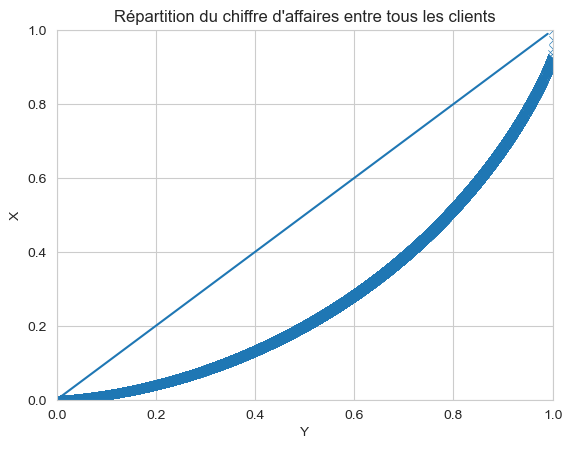

In [32]:

# ----------------------------------------------------------------------------------------------------------------------
# Courbe de Lorenz -----------------------------------------------------------------------------------------------------

chiffreAffaireClient = tableTotale.groupby('client_id')['price'].sum().rename('chiffre d\'affaire').sort_values()

lorenz(chiffreAffaireClient, 'Répartition du chiffre d\'affaires entre tous les clients')

# Corrélation entre les caractéristiques

<AxesSubplot:>

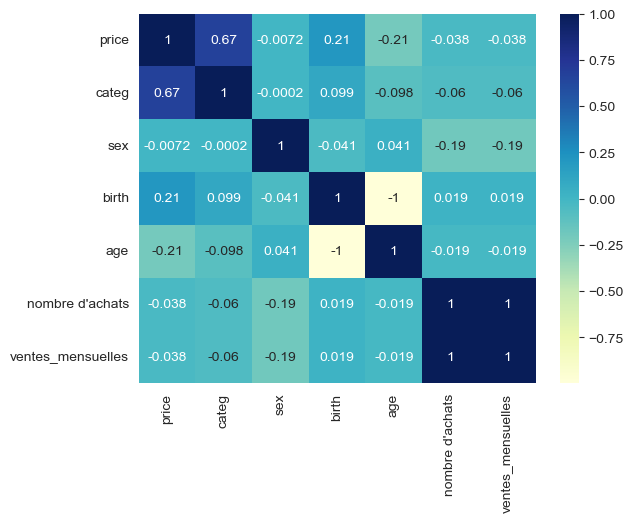

In [33]:
#Lien entre données
sns.heatmap(tableTotale.replace({"m": 0,"f": 1}).corr(), annot = True, fmt='.2g',cmap= 'YlGnBu')

price    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

<Figure size 1000x1000 with 0 Axes>

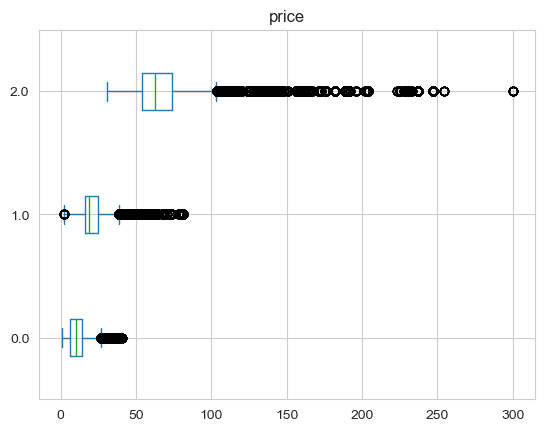

In [34]:
#Prix/catégorie
plt.figure(figsize=(10,10))
chiffreAffaire.plot.box(column="price", by="categ", vert=False, showfliers=True)

price    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

<Figure size 1000x1000 with 0 Axes>

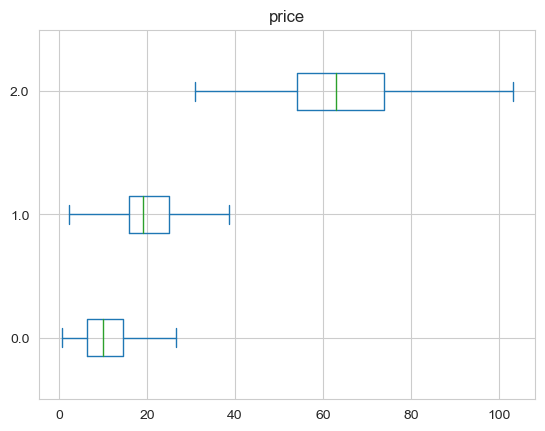

In [35]:
#Prix/catégorie
plt.figure(figsize=(10,10))
chiffreAffaire.plot.box(column="price", by="categ", vert=False, showfliers=False)

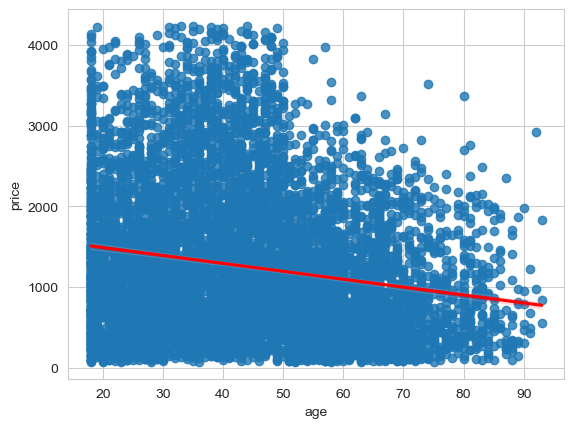

In [36]:
# ----------------------------------------------------------------------------------------------------------------------
# Lien entre age et montant des achats ---------------------------------------------------------------------------------

ageMontant = tableTotale[['client_id', 'birth', 'price', 'sex']].groupby(by=['client_id', 'birth', 'sex'], as_index=False)['price'].sum()
ageMontant['age'] = 2022 - ageMontant['birth']
ageMontant = ageMontant[ageMontant.price.between(ageMontant.price.quantile(.01), ageMontant.price.quantile(.99))]
sns.regplot(x="age", y="price", data=ageMontant, line_kws={'color': 'red'})
plt.show()

# Prix en fonction de l'age

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Prix moyen du livre acheté')]

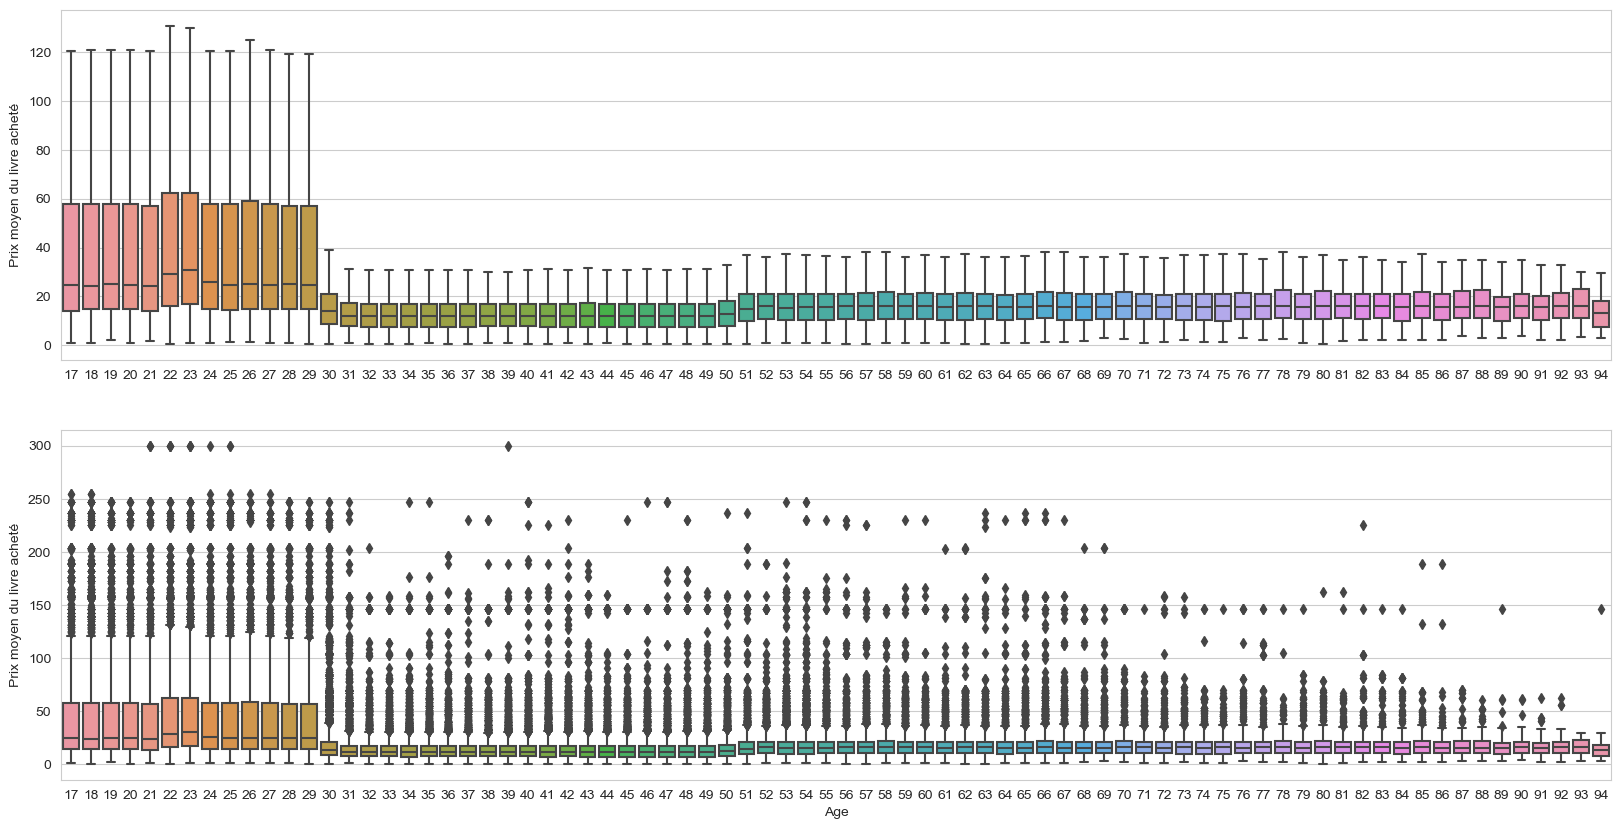

In [37]:
f, (ax_box1, ax_box) = plt.subplots(2, sharex=False, gridspec_kw={"height_ratios": (.5, .5)},  figsize=(20,10))

sns.boxplot(data=tableTotale, x='age',y='price',ax=ax_box1, showfliers=False)
sns.boxplot(data=tableTotale, x='age',y='price',ax=ax_box)

ax_box1.set(xlabel='',ylabel='Prix moyen du livre acheté')
ax_box.set(xlabel='Age',ylabel='Prix moyen du livre acheté')

[Text(0.5, 0, "Tranche d'age"), Text(0, 0.5, 'Prix moyen du livre acheté')]

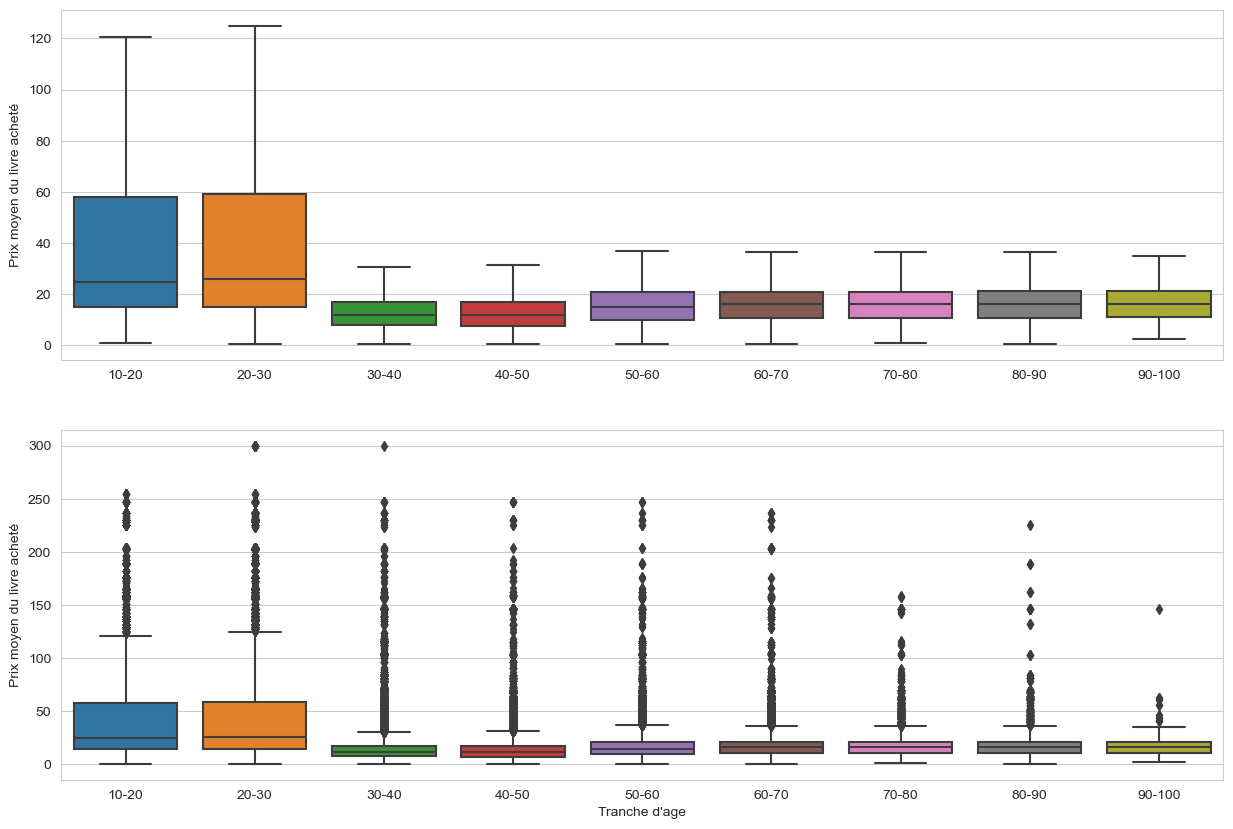

In [38]:
f, (ax_box1, ax_box) = plt.subplots(2, sharex=False, gridspec_kw={"height_ratios": (.5, .5)},  figsize=(15,10))

sns.boxplot(data=tableTotale.sort_values(by='trancheAge'), x='trancheAge',y='price',ax=ax_box1, showfliers=False)
sns.boxplot(data=tableTotale.sort_values(by='trancheAge'), x='trancheAge',y='price',ax=ax_box)

ax_box1.set(xlabel='',ylabel='Prix moyen du livre acheté')
ax_box.set(xlabel='Tranche d\'age',ylabel='Prix moyen du livre acheté')



# Lien entre age et catégorie

<AxesSubplot:xlabel='age', ylabel='Count'>

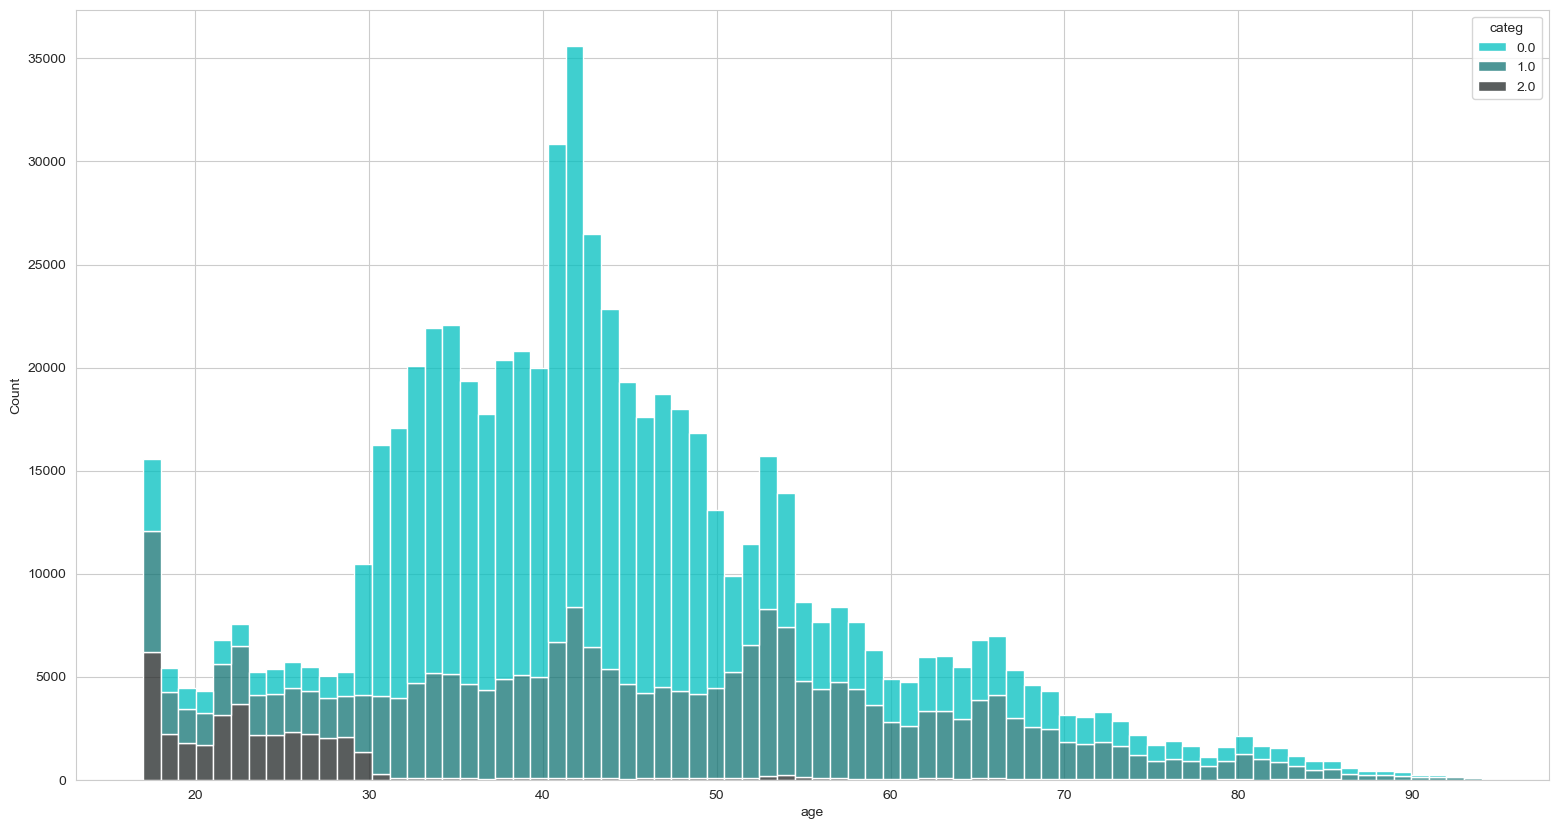

In [39]:
plt.figure(figsize=(19,10))
sns.histplot(data=tableTotale.sort_values(by='age'), x='age', hue='categ',bins=93-17,palette="dark:c_r",multiple='stack')

<AxesSubplot:xlabel='trancheAge', ylabel='Count'>

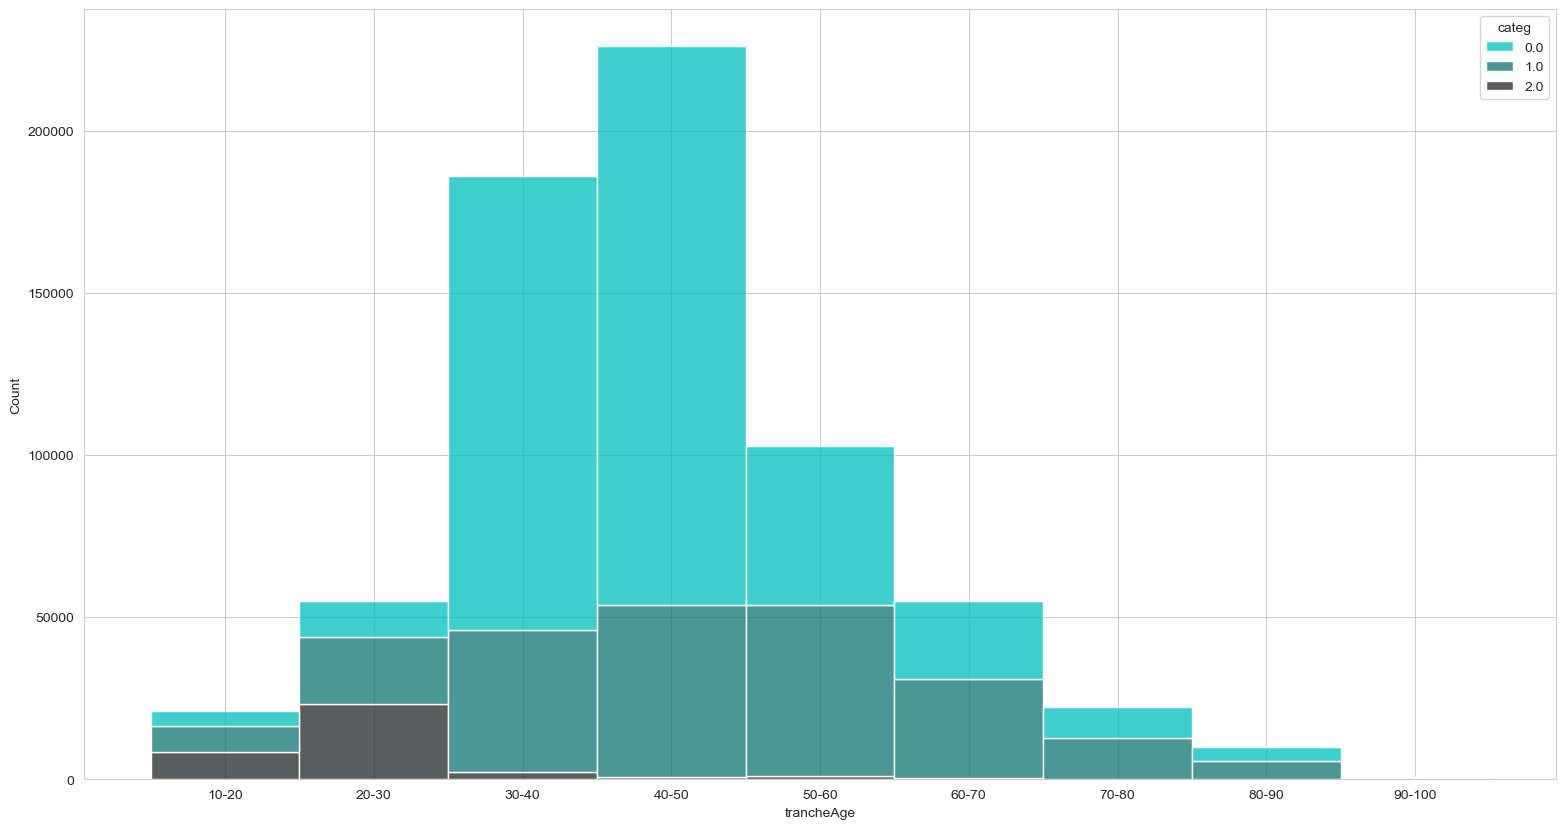

In [40]:
plt.figure(figsize=(19,10))
sns.histplot(data=tableTotale.sort_values(by='trancheAge'), x='trancheAge', hue='categ',palette="dark:c_r",multiple='stack')

# Lien entre catégorie et genre

<AxesSubplot:xlabel='sex', ylabel='Count'>

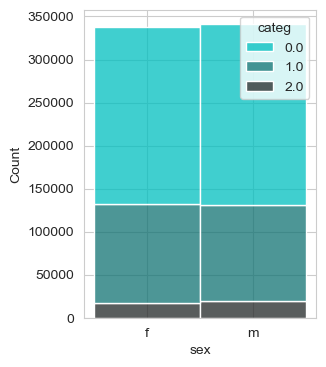

In [41]:
plt.figure(figsize=(3,4))
sns.histplot(data=tableTotale.sort_values(by='trancheAge'), x='sex', hue='categ',palette="dark:c_r",multiple='stack')